In [766]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from datetime import datetime

In [767]:
pd.set_option('max_seq_items', 200)

In [768]:
pd.set_option("display.max_columns", 200)

In [769]:
pd.set_option("display.max_rows", 200)

In [770]:
shows = pd.read_csv('good_shows_data2.csv')

In [771]:
shows = shows[shows['first_year']>=1980]

In [772]:
shows = shows[shows['seasons'] != 0]

In [773]:
shows['release_date'] = shows['release_date'].dropna().apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [774]:
shows['release_month'] = shows['release_date'].dropna().apply(lambda x: x.strftime('%m'))
shows['release_month'] = shows['release_month'].dropna().apply(lambda x: int(x))

In [775]:
shows['release_weekday'] = shows['release_date'].dropna().apply(lambda x: x.strftime('%w'))
shows['release_weekday'] = shows['release_weekday'].dropna().apply(lambda x: int(x))

In [776]:
cancelled_shows = shows[shows['cancelled'] == 1]

In [777]:
shows['release_weekday'].value_counts()

1.0    383
0.0    351
3.0    301
2.0    287
6.0    256
5.0    255
4.0    213
Name: release_weekday, dtype: int64

In [778]:
shows.dtypes

json                            object
title_rough                     object
check                            int64
title                           object
imdb_id                         object
big_json                        object
seasons                          int64
cancelled                        int64
runtime                         object
genres                          object
imdb_rating                    float64
release_date            datetime64[ns]
plot                            object
year                            object
type                            object
votes                           object
keywords                        object
first_year                       int64
is_new                           int64
fixed_runtime                  float64
is_action                        int64
is_adventure                     int64
is_animation                     int64
is_biography                     int64
is_comedy                        int64
is_crime                 

In [779]:
shows['started_sunday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==0 else 0)
shows['started_monday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==1 else 0)
shows['started_tuesday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==2 else 0)
shows['started_wednesday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==3 else 0)
shows['started_thursday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==4 else 0)
shows['started_friday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==5 else 0)
shows['started_saturday'] = shows['release_weekday'].dropna().apply(lambda x: 1 if int(x)==6 else 0)

In [780]:
shows['started_saturday'].sum()

256.0

In [781]:
plt.style.use('ggplot')

In [782]:
shows.head()

,json,title_rough,check,title,imdb_id,big_json,seasons,cancelled,runtime,genres,imdb_rating,release_date,plot,year,type,votes,keywords,first_year,is_new,fixed_runtime,is_action,is_adventure,is_animation,is_biography,is_comedy,is_crime,is_documentary,is_drama,is_family,is_fantasy,is_game,is_history,is_horror,is_music,is_musical,is_mystery,is_news,is_reality,is_romance,is_sci,is_short,is_sport,is_talk,is_thriller,is_war,is_western,release_month,release_weekday,release_monthday,stemmed_plot,stemmed_keywords,keyword_adult,keyword_african,keyword_alien,keyword_american,keyword_angel,keyword_anim,keyword_base,keyword_best,keyword_black,keyword_book,keyword_boy,keyword_boyfriend,keyword_brother,keyword_california,keyword_celebr,keyword_charact,keyword_child,keyword_citi,keyword_comedi,keyword_comedian,keyword_comic,keyword_cult,keyword_daughter,keyword_death,keyword_detect,keyword_doctor,keyword_evil,keyword_famili,keyword_father,keyword_femal,keyword_fiction,keyword_friend,keyword_friendship,keyword_gay,keyword_girl,keyword_girlfriend,keyword_hero,keyword_humor,keyword_husband,keyword_interraci,keyword_interview,keyword_investig,keyword_joke,keyword_life,keyword_live,keyword_love,keyword_male,keyword_man,keyword_marriag,keyword_mother,keyword_murder,keyword_new,keyword_offic,keyword_parent,keyword_parodi,keyword_play,keyword_polic,keyword_power,keyword_protagonist,keyword_relationship,keyword_satir,keyword_school,keyword_secret,keyword_sex,keyword_share,keyword_sister,keyword_sitcom,keyword_social,keyword_son,keyword_spoken,keyword_spoof,keyword_stand,keyword_student,keyword_superhero,keyword_supernatur,keyword_surreal,keyword_teenag,keyword_versu,keyword_villain,keyword_violenc,keyword_wife,keyword_woman,keyword_york,plot_cleaned,network,from_ABC,from_NBC,from_CBS,from_Fox,from_Nickelodeon,from_Cartoon,from_Comedy,from_MTV,from_HBO,from_Disney,from_WB,started_sunday,started_monday,started_tuesday,started_wednesday,started_thursday,started_friday,started_saturday,started_january,started_february,started_march,started_april,started_may,started_june,started_july,started_august,started_september,started_october,started_november,started_december,half_hour,full_hour
0,"{u'imdbID': u'tt3523560', u'Title': u'Little C...",January 12 - Little Charmers,1,Little Charmers,tt3523560,"{u'totalSeasons': u'2', u'Plot': u'Hip and edg...",2,0,NaN,Animation,6.4,2015-01-12,"[hip, edge, animation, welcomes, world, magic,...",2015–,series,65,NaN,2015,1,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,12.0,hip edg anim welcom world magic imagin littl p...,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,hip edge animation welcomes world magic imagin...,3e,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"{u'imdbID': u'tt3596178', u'Title': u'Bella an...",January 17 - Bella and the Bulldogs,1,Bella and the Bulldogs,tt3596178,"{u'totalSeasons': u'2', u'Plot': u'Follows a p...",2,0,30 min,"Comedy, Family",5.1,2015-01-17,"[follows, perky, head, cheerleader, named, bel...",2015–2016,series,848,texas cheerleader high school football footbal...,2015,1,30.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,6.0,17.0,follow perki head cheerlead name bella whose l...,texa cheerlead high school footbal footbal pla...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,follows perky head cheerleader named bella who...,BT Industrial Supply,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,"{u'imdbID': u'tt3521854', u'Title': u'Power Ra...",February 7 - Power Rangers Dino Charge,1,Power Rangers Dino Charge,tt3521854,"{u'totalSeasons': u'2', u'Plot': u'On prehisto...",2,0,21 min,"Action, Adventure, Fantasy",7.0,2015-02-07,"[prehistoric, earth, alien, entrusted, p

In [783]:
shows.dtypes

json                            object
title_rough                     object
check                            int64
title                           object
imdb_id                         object
big_json                        object
seasons                          int64
cancelled                        int64
runtime                         object
genres                          object
imdb_rating                    float64
release_date            datetime64[ns]
plot                            object
year                            object
type                            object
votes                           object
keywords                        object
first_year                       int64
is_new                           int64
fixed_runtime                  float64
is_action                        int64
is_adventure                     int64
is_animation                     int64
is_biography                     int64
is_comedy                        int64
is_crime                 

In [784]:
shows.columns

Index([u'json', u'title_rough', u'check', u'title', u'imdb_id', u'big_json',
       u'seasons', u'cancelled', u'runtime', u'genres', u'imdb_rating',
       u'release_date', u'plot', u'year', u'type', u'votes', u'keywords',
       u'first_year', u'is_new', u'fixed_runtime', u'is_action',
       u'is_adventure', u'is_animation', u'is_biography', u'is_comedy',
       u'is_crime', u'is_documentary', u'is_drama', u'is_family',
       u'is_fantasy', u'is_game', u'is_history', u'is_horror', u'is_music',
       u'is_musical', u'is_mystery', u'is_news', u'is_reality', u'is_romance',
       u'is_sci', u'is_short', u'is_sport', u'is_talk', u'is_thriller',
       u'is_war', u'is_western', u'release_month', u'release_weekday',
       u'release_monthday', u'stemmed_plot', u'stemmed_keywords',
       u'keyword_adult', u'keyword_african', u'keyword_alien',
       u'keyword_american', u'keyword_angel', u'keyword_anim', u'keyword_base',
       u'keyword_best', u'keyword_black', u'keyword_book', u'keywor

In [785]:
shows.isnull().sum().sum()

4241

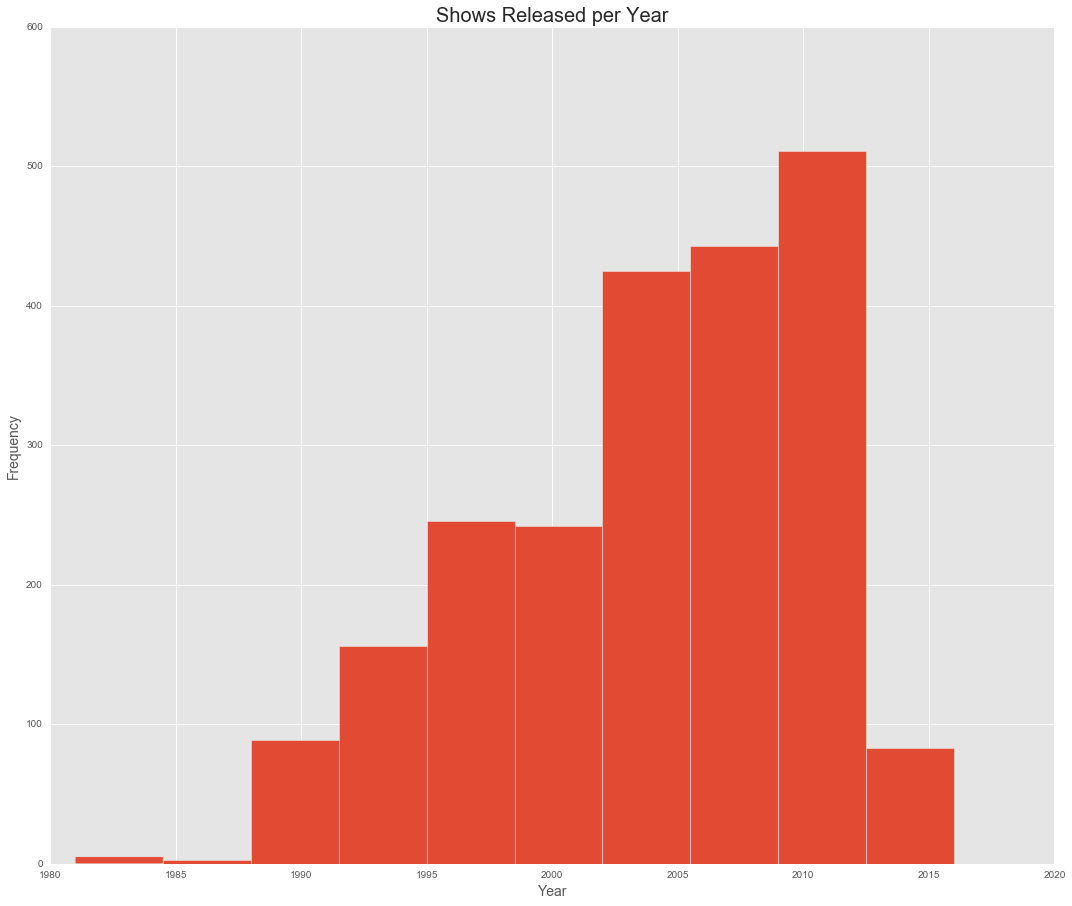

In [786]:
plt.figure(figsize=(18, 15))
plt.hist(shows['first_year'])
plt.title('Shows Released per Year', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# plt.xlim((1980, 2016))

In [787]:
shows['is_fantasy'].sum()

73

In [788]:
shows['release_month'].value_counts()

9.0     517
1.0     242
10.0    227
6.0     169
3.0     163
7.0     154
8.0     143
4.0     128
2.0      94
11.0     91
5.0      64
12.0     54
Name: release_month, dtype: int64

In [789]:
shows['release_month'].value_counts()

9.0     517
1.0     242
10.0    227
6.0     169
3.0     163
7.0     154
8.0     143
4.0     128
2.0      94
11.0     91
5.0      64
12.0     54
Name: release_month, dtype: int64

In [790]:
shows['started_saturday'].sum()

256.0

In [791]:
shows[shows['release_weekday']==0]

,json,title_rough,check,title,imdb_id,big_json,seasons,cancelled,runtime,genres,imdb_rating,release_date,plot,year,type,votes,keywords,first_year,is_new,fixed_runtime,is_action,is_adventure,is_animation,is_biography,is_comedy,is_crime,is_documentary,is_drama,is_family,is_fantasy,is_game,is_history,is_horror,is_music,is_musical,is_mystery,is_news,is_reality,is_romance,is_sci,is_short,is_sport,is_talk,is_thriller,is_war,is_western,release_month,release_weekday,release_monthday,stemmed_plot,stemmed_keywords,keyword_adult,keyword_african,keyword_alien,keyword_american,keyword_angel,keyword_anim,keyword_base,keyword_best,keyword_black,keyword_book,keyword_boy,keyword_boyfriend,keyword_brother,keyword_california,keyword_celebr,keyword_charact,keyword_child,keyword_citi,keyword_comedi,keyword_comedian,keyword_comic,keyword_cult,keyword_daughter,keyword_death,keyword_detect,keyword_doctor,keyword_evil,keyword_famili,keyword_father,keyword_femal,keyword_fiction,keyword_friend,keyword_friendship,keyword_gay,keyword_girl,keyword_girlfriend,keyword_hero,keyword_humor,keyword_husband,keyword_interraci,keyword_interview,keyword_investig,keyword_joke,keyword_life,keyword_live,keyword_love,keyword_male,keyword_man,keyword_marriag,keyword_mother,keyword_murder,keyword_new,keyword_offic,keyword_parent,keyword_parodi,keyword_play,keyword_polic,keyword_power,keyword_protagonist,keyword_relationship,keyword_satir,keyword_school,keyword_secret,keyword_sex,keyword_share,keyword_sister,keyword_sitcom,keyword_social,keyword_son,keyword_spoken,keyword_spoof,keyword_stand,keyword_student,keyword_superhero,keyword_supernatur,keyword_surreal,keyword_teenag,keyword_versu,keyword_villain,keyword_violenc,keyword_wife,keyword_woman,keyword_york,plot_cleaned,network,from_ABC,from_NBC,from_CBS,from_Fox,from_Nickelodeon,from_Cartoon,from_Comedy,from_MTV,from_HBO,from_Disney,from_WB,started_sunday,started_monday,started_tuesday,started_wednesday,started_thursday,started_friday,started_saturday,started_january,started_february,started_march,started_april,started_may,started_june,started_july,started_august,started_september,started_october,started_november,started_december,half_hour,full_hour
3,"{u'imdbID': u'tt3219170', u'Title': u'Harvey B...",March 29 - Harvey Beaks,1,Harvey Beaks,tt3219170,"{u'totalSeasons': u'2', u'Plot': u'A mild-mann...",2,0,22 min,"Animation, Comedy, Family",6.9,2015-03-29,"[mildmannered, young, bird, best, friends, pai...",2015–,series,646,NaN,2015,1,22.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0.0,29.0,mildmann young bird best friend pair rambuncti...,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,mildmannered young bird best friends pair ramb...,Nickelodeon Network,0,0,0,0,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
15,"{u'imdbID': u'tt2486176', u'Title': u'Chasing ...",January 20 - Chasing The Saturdays,1,Chasing The Saturdays,tt2486176,"{u'totalSeasons': u'1', u'Plot': u'The Saturda...",1,1,NaN,"Music, Reality-TV",7.6,2013-01-20,"[saturdays, followed, cameras, british, girl, ...",2013–,series,91,british pop english music british music 2010s ...,2013,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.0,20.0,saturday follow camera british girl group come...,british pop english music british music 2010 2...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,saturdays followed cameras british girl group ...,E! Entertainment Television,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
22,"{u'imdbID': u'tt3056472', u'Title': u'Total Di...",July 28 - Total Divas,1,Total Divas,tt3056472,"{u'totalSeasons': u'5', u'Plot': u'Follow the ...",5,0,44 min,"Biography, Drama, Reality-TV",6.7,2013-07-28,"[follow, lives, wwe, divas, work, re

(1, 31)

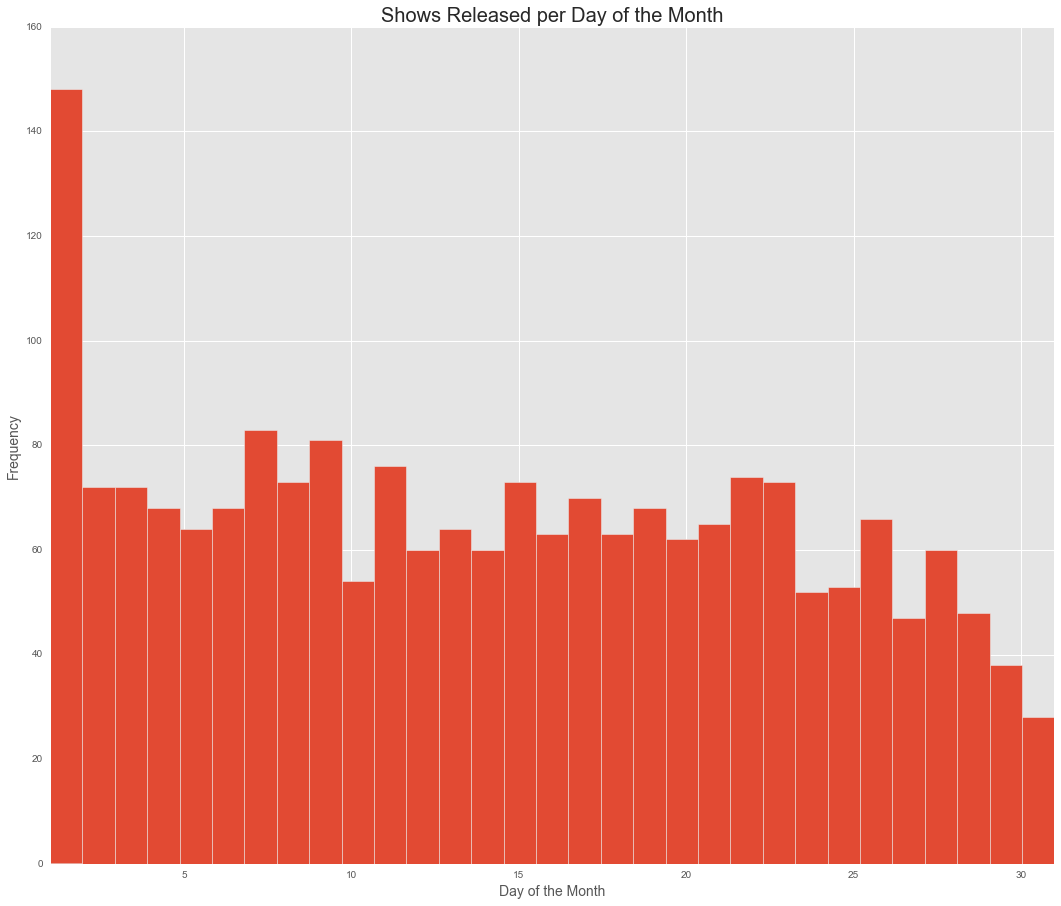

In [792]:
plt.figure(figsize=(18, 15))
plt.hist(shows['release_monthday'].dropna(), bins=31)
plt.title('Shows Released per Day of the Month', fontsize=20)
plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim((1,31))


In [793]:
networks = ['from_ABC', u'from_NBC', u'from_CBS', u'from_Fox', u'from_Nickelodeon',
       u'from_Cartoon', u'from_Comedy', u'from_MTV', u'from_HBO',
       u'from_Disney', u'from_WB']
network_numbers = []
cancelled_network_numbers = []
for i in networks:
    network_numbers.append(shows[''+i].sum())
    cancelled_network_numbers.append(cancelled_shows[''+i].sum())

In [794]:
network_numbers

[218, 155, 128, 165, 64, 61, 47, 76, 41, 56, 53]

(-0.25, 10.75)

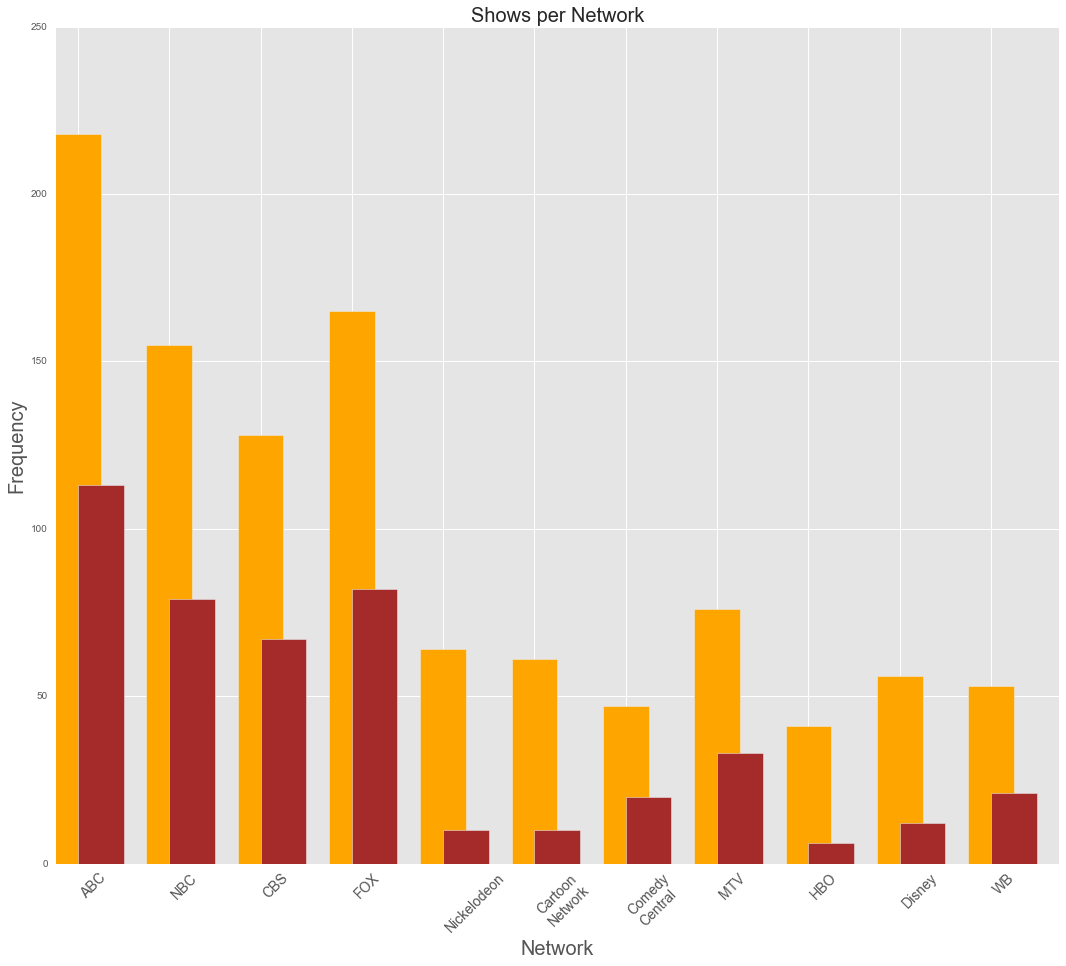

In [795]:
plt.figure(figsize=(18, 15))
plt.bar(range(0, len(network_numbers)), network_numbers, width=.5, align='center', color='orange')
plt.bar(range(0, len(cancelled_network_numbers)), cancelled_network_numbers, width=.5, color='brown')
plt.title('Shows per Network', fontsize=20)
plt.xlabel('Network', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(range(0,11), ['ABC', 'NBC', 'CBS', 'FOX', 'Nickelodeon', 'Cartoon\nNetwork', 'Comedy\nCentral', 'MTV', 'HBO', 'Disney', 'WB'],
          fontsize=14, rotation=45, ha='left')
plt.xlim((-.25,10.75))

In [796]:
weekdays = ['started_sunday', u'started_monday', u'started_tuesday', u'started_wednesday', u'started_thursday',
       u'started_friday', u'started_saturday']
weekday_numbers = []
for i in weekdays:
    weekday_numbers.append(shows[''+i].sum())

In [797]:
cancelled_weekday_numbers = []
for i in weekdays:
    cancelled_weekday_numbers.append(cancelled_shows[''+i].sum())

In [798]:
weekday_numbers

[351.0, 383.0, 287.0, 301.0, 213.0, 255.0, 256.0]

(-0.25, 6.75)

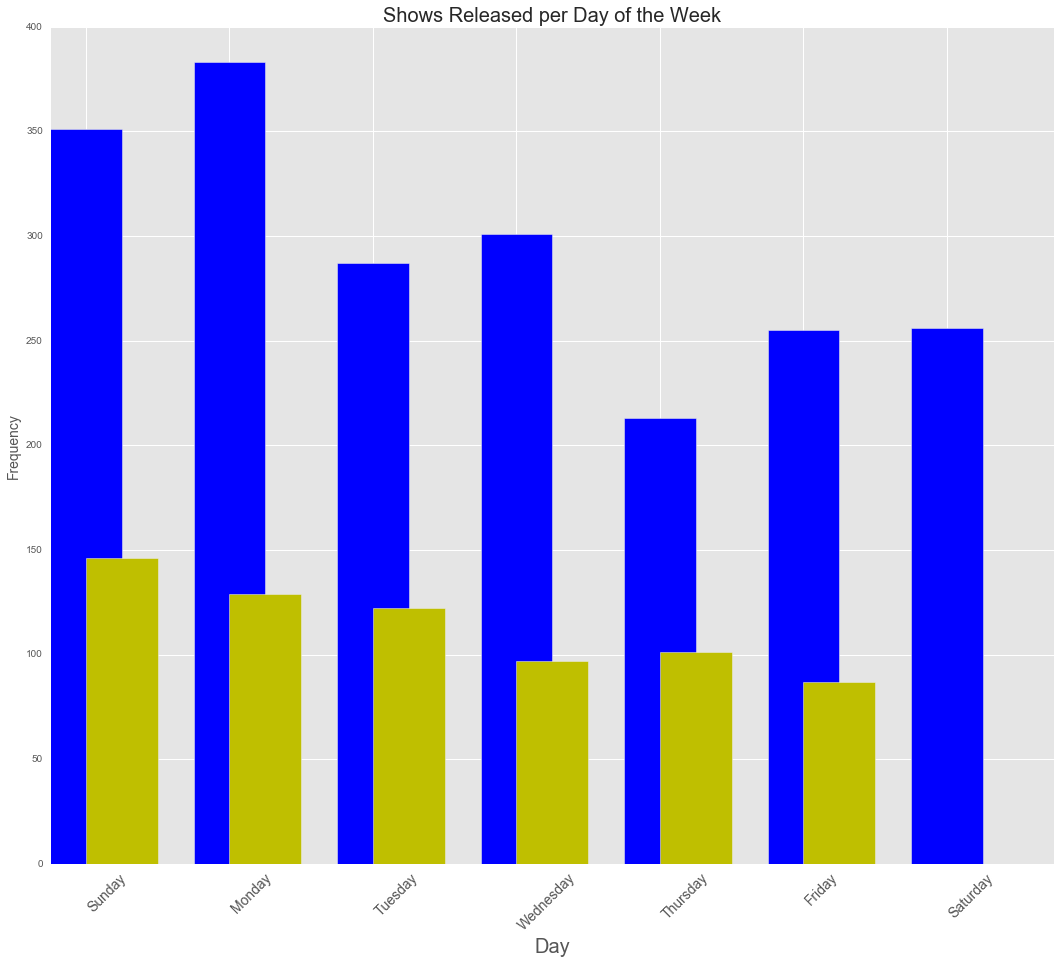

In [799]:
plt.figure(figsize=(18, 15))
plt.bar(range(0, len(weekday_numbers)), weekday_numbers, align='center', width=.5, color='b')
plt.bar(range(0, len(cancelled_weekday_numbers)), cancelled_weekday_numbers, width=.5, color='y')
plt.title('Shows Released per Day of the Week', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(0,7), ['Sunday', 'Monday', 'Tuesday', 
                         'Wednesday', 'Thursday', 'Friday', 'Saturday'],
                          fontsize=14, rotation=45, ha='left')
plt.xlim((-.25,6.75))

In [800]:
months = ['started_january', u'started_february', u'started_march', u'started_april', u'started_may', 'started_june',
          'started_july', 'started_august', 'started_september', 'started_october', 'started_november', 'started_december']
month_numbers = []
for i in months:
    month_numbers.append(shows[''+i].sum())

In [801]:
months = ['started_january', u'started_february', u'started_march', u'started_april', u'started_may', 'started_june',
          'started_july', 'started_august', 'started_september', 'started_october', 'started_november', 'started_december']
cancelled_month_numbers = []
for i in months:
    cancelled_month_numbers.append(cancelled_shows[''+i].sum())

(-0.5, 12)

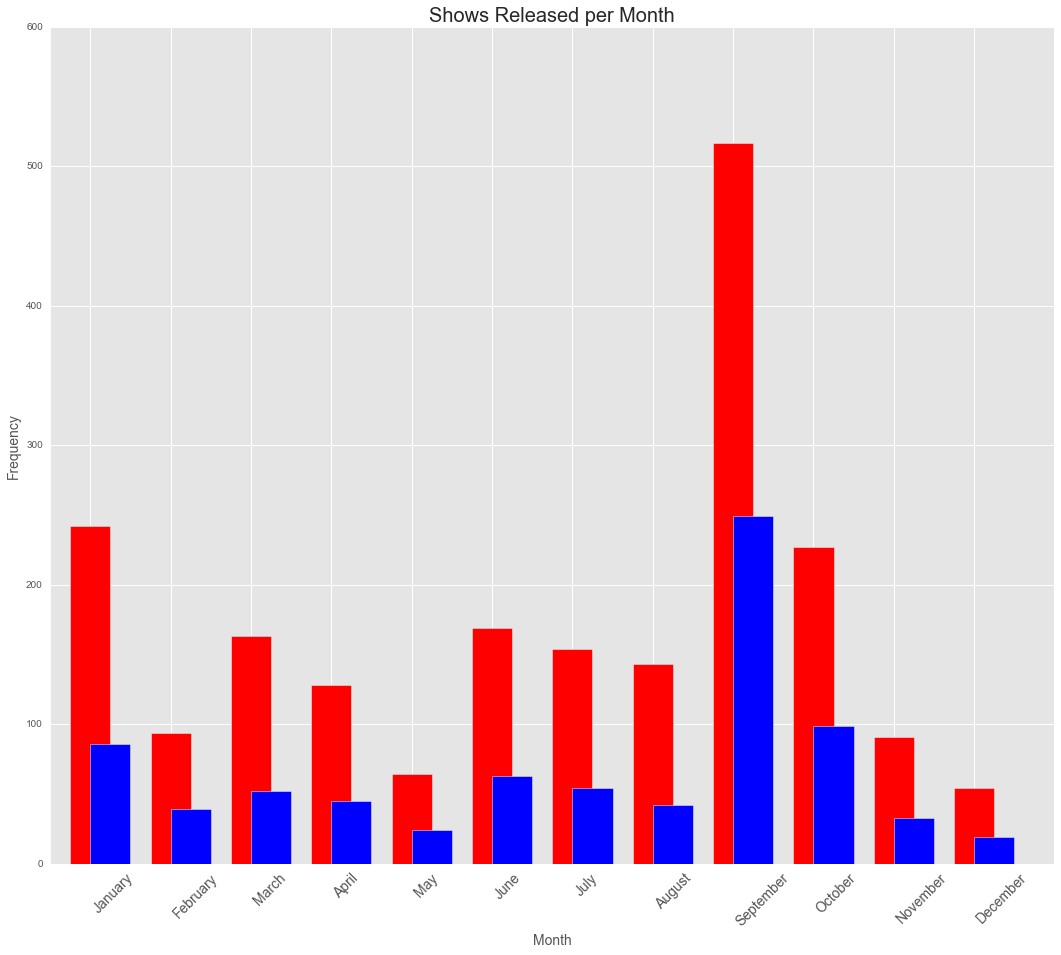

In [802]:
plt.figure(figsize=(18, 15))
plt.bar(range(0, len(month_numbers)), month_numbers, width=.5, color='r', align='center')
plt.bar(range(0, len(cancelled_month_numbers)), cancelled_month_numbers, width=.5, color='b')
plt.title('Shows Released per Month', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(0,12), ['January', 'February', 'March', 
                         'April', 'May', 'June', 'July', 'August', 'September',
                         'October', 'November', 'December'],
                          fontsize=14, rotation=45, ha='left')
plt.xlim((-.5,12))

In [803]:
# ax = plt.subplot(111)
# ax.bar(x-0.2, y,width=0.2,color='b',align='center')
# ax.bar(x, z,width=0.2,color='g',align='center')
# ax.bar(x+0.2, k,width=0.2,color='r',align='center')
# ax.xaxis_date()

# plt.show()

In [804]:
months = ['started_january', u'started_february', u'started_march', u'started_april', u'started_may', 'started_june',
          'started_july', 'started_august', 'started_september', 'started_october', 'started_november', 'started_december']
cancelled_month_numbers = []
for i in months:
    cancelled_month_numbers.append(cancelled_shows[''+i].sum())

(-0.5, 12)

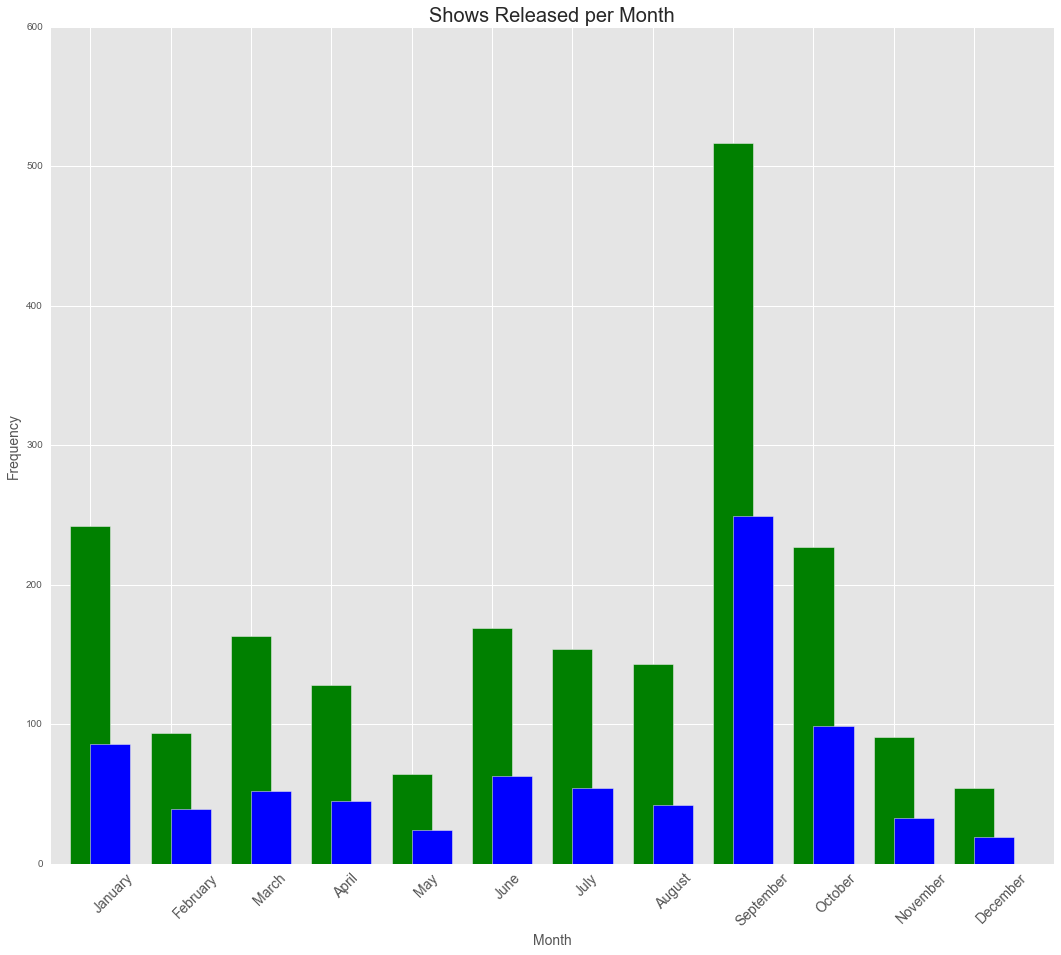

In [805]:
plt.figure(figsize=(18, 15))
plt.bar(range(0, len(month_numbers)), month_numbers, color='g', width=0.5, align='center')
plt.bar(range(0, len(cancelled_month_numbers)), cancelled_month_numbers, width=0.5, color='b')
plt.title('Shows Released per Month', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(0,12), ['January', 'February', 'March', 
                         'April', 'May', 'June', 'July', 'August', 'September',
                         'October', 'November', 'December'],
                          fontsize=14, rotation=45, ha='left')
plt.xlim((-.5,12))